In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import label_binarize

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [2]:
df = pd.read_csv("Data/US_Accidents_March23.csv")
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [26]:
features = ['Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 
            'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 
            'Wind_Speed(mph)', 'Precipitation(in)', 'Amenity', 
            'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 
            'Railway', 'Roundabout', 'Station', 'Stop', 'Severity',
            'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']

features_to_one_hot_encode = ['Wind_Direction']

df_temp = df.copy().dropna()

df_encoded = pd.get_dummies(df_temp[features], columns=features_to_one_hot_encode)

features = list(df_encoded.columns)
features.remove('Severity')

In [27]:
# Split the data into X and Y
Y = df_encoded['Severity']
X = df_encoded[features]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

# Standardize the features
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
# Initialize the logistic regression model with 'ovr' (one-vs-rest) strategy by default
model = LogisticRegression(multi_class='multinomial', max_iter=10000, random_state=42)

# Fit the model on the training data
model.fit(X_train_scaled, Y_train)

LogisticRegression(max_iter=10000, multi_class='multinomial', random_state=42)

In [35]:
# Make predictions on the test data
Y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
report = classification_report(Y_test, Y_pred)

# Compute the AUC
# Binarize the output labels for AUC calculation
Y_test_binarized = label_binarize(Y_test, classes=model.classes_)
Y_pred_proba = model.predict_proba(X_test_scaled)

auc_score = roc_auc_score(Y_test_binarized, Y_pred_proba, average='macro')

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)
print(f'AUC Score: {auc_score}')

c:\Users\balda\anaconda3\envs\mb_ml\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\balda\anaconda3\envs\mb_ml\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\balda\anaconda3\envs\mb_ml\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.9418930993272852
Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      6379
           2       0.94      1.00      0.97    837022
           3       0.16      0.00      0.00     16986
           4       0.00      0.00      0.00     28251

    accuracy                           0.94    888638
   macro avg       0.27      0.25      0.24    888638
weighted avg       0.89      0.94      0.91    888638

AUC Score: 0.6638539126777722


Confusion Matrix:
[[     0   6379      0      0]
 [     0 836997     25      0]
 [     0  16981      5      0]
 [     0  28249      2      0]]


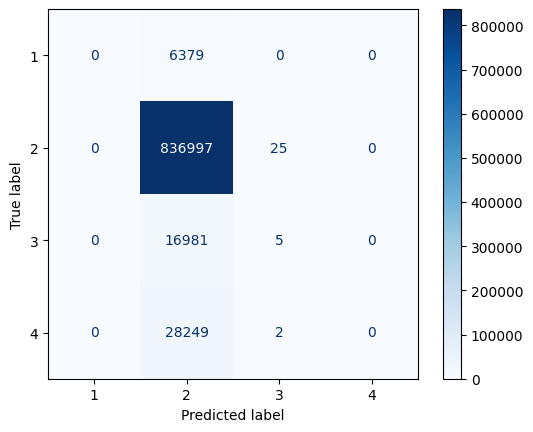

In [36]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)

# Print the confusion matrix
print('Confusion Matrix:')
print(conf_matrix)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()